In [1]:
%matplotlib notebook

import time
import numpy as np
from matplotlib import pyplot as plt
from IPython import display

# Simple example

<IPython.core.display.Javascript object>


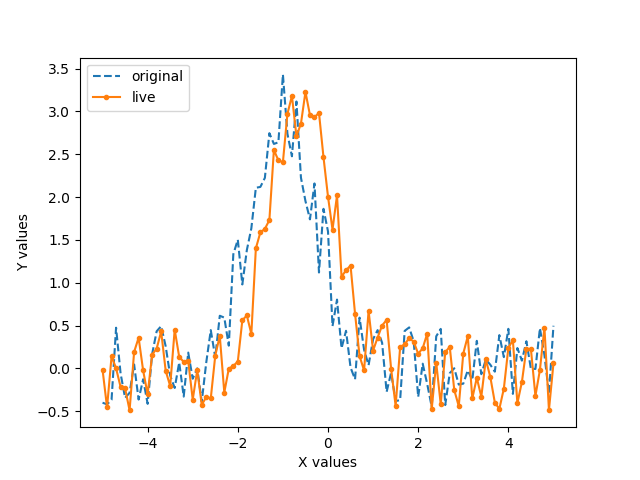

In [18]:
def get_trace(xvals):
    x0 = 2. * np.random.rand(1) - 1.
    yvals = -0.5 + np.random.rand(xvals.size) + 3. * np.exp(-(xvals-x0)**2)
    return yvals

def do_something_and_update_plot(ax, linex, line=None): 
    liney = get_trace(linex)
    time.sleep(0.5)
    
    if line is None:
        line = ax.plot(linex, liney, '.-', label='live')[0]
        ax.legend(loc='upper left')
    else:
        line.set_ydata(liney)
    
    ax.relim()
    ax.autoscale_view(True, True, True)
    ax.get_figure().canvas.draw()
    return line
        

linex = np.linspace(-5, 5, 101)
liney = get_trace(linex)
update_line = None

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('X values')
ax.set_ylabel('Y values')

ax.plot(linex, liney, '--', label='original')
ax.legend(loc='upper left')

for i in range(10):
    update_line = do_something_and_update_plot(ax, linex, line=update_line)

# Wrapping as argument-less function

<IPython.core.display.Javascript object>


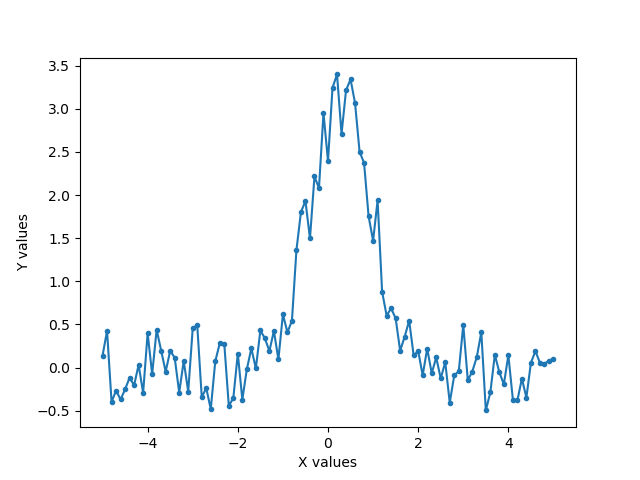

ABC
ABC
ABC
ABC
ABC
ABC
ABC
ABC
ABC
ABC


In [20]:
from functools import partial

def get_yvals():
    global xvals
    return get_trace(xvals)

def measure_and_plot_trace(ax, line):
    liney = get_yvals()
    time.sleep(0.5)
    
    line.set_ydata(liney)
    ax.relim()
    ax.autoscale_view(True, True, True)
    ax.get_figure().canvas.draw()
    
    return 'ABC'
    

xvals = np.linspace(-5., 5., 101)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('X values')
ax.set_ylabel('Y values')
line = ax.plot(xvals, np.zeros_like(xvals), '.-')[0]

# now we wrap the measure function such that it doesn't need arguments anymore
# of course this requires that we have already good constant values for ax and line
measure_trace = partial(measure_and_plot_trace, ax, line)

# now we just have to call the new function wrapper without arguments
for i in range(10):
    print(measure_trace())